In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# y = 4 + 0.2*x1 + 1.2*(x1**2)
def func1(x1):
    y = 4 + 5*(x1**2) + np.random.sample()
    return y

# x(degree = 2) -> x**0, x**1, x**2
# x(degree = 3) -> x**0, x**1, x**2, x**3

In [3]:
X = np.random.sample((80,))
y = pd.DataFrame(X)[0].apply(func1)

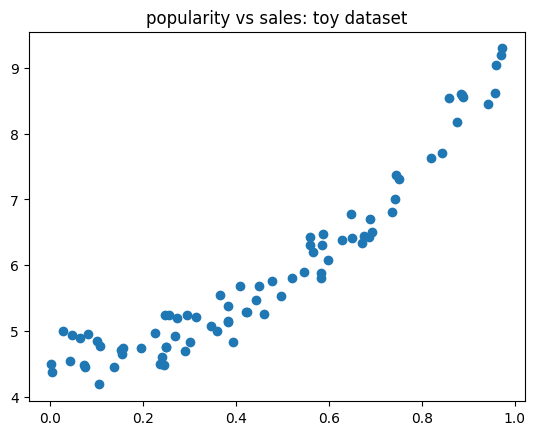

In [4]:
plt.title("popularity vs sales: toy dataset")
plt.scatter(x=X, y=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2)

In [6]:
from sklearn.metrics import r2_score

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.8571373427220205

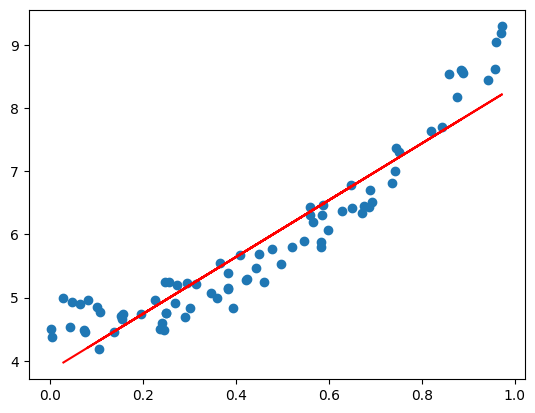

In [32]:
plt.scatter(x=X, y=y)
plt.plot(X_test, y_pred, c='red')

In [11]:
# Linear Regression
np.mean(cross_val_score(lr, X.reshape(-1,1), y, cv=10,scoring='r2'))

0.8465229841997527

In [12]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_poly = poly.transform(X.reshape(-1,1))

In [13]:
plr = LinearRegression()
plr.fit(X_train_poly, y_train)

LinearRegression()

In [14]:
y_pred_poly = plr.predict(X_test_poly)
r2_score(y_test, y_pred_poly)

0.9548289942816798

In [15]:
# Polynomial
np.mean(cross_val_score(plr, poly.transform(X.reshape(-1,1)), y, cv=10,scoring='r2'))

0.9500738311795732

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

In [17]:
poly_pipe = Pipeline([
 ("polynomial transform", PolynomialFeatures(degree=3, include_bias=False)),
    ("Linear Regression", SGDRegressor(learning_rate='constant', eta0=0.01))
])

In [18]:
poly_pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('Linear Regression', SGDRegressor(learning_rate='constant'))])

In [19]:
r2_score(y_test, poly_pipe.predict(X_test))

0.9382462373876943

In [20]:
np.mean(cross_val_score(poly_pipe, X.reshape(-1,1), y, cv=10,scoring='r2'))

0.9374294692684721

In [21]:
# np.insert(X_train, 0, 1, axis=1)

In [50]:
test = pd.DataFrame()
test['X_test'] = X_test.reshape(-1)
test['y_pred_'] = y_pred_poly

In [51]:
test = test.sort_values(by='X_test')

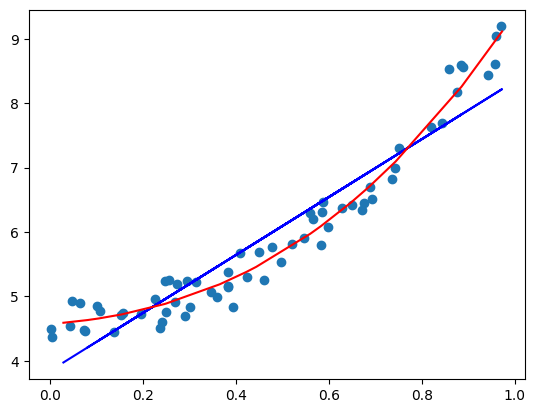

In [58]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, c='blue')
plt.plot(test['X_test'].values.reshape(-1,1), test['y_pred_'].values, c='red')